# Density Based Clustering Technique on Higher Dimentionality Dataset 

DBSCAN - Density Based Spatial Clustering of Applications with Noise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
dataset = pd.read_csv('costpercompany.csv')
dataset

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636
5,Southern,1.05,12.60,150,56.7,2.7,10140,0.0,1.108
6,Shell,1.95,10.58,185,36.0,8.2,20004,26.7,1.305
7,San Diego,0.76,6.40,136,61.9,9.0,5714,8.3,1.920
8,Puget,1.16,9.90,252,56.0,9.2,15991,0.0,0.620
9,Pacific,0.96,7.60,164,62.2,-0.1,6468,0.9,1.400


In [4]:
#Extracting Numerical Variables from the dataset to carry out clustering on
ex_data = dataset.iloc[:,1:]
ex_data

,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636
5,1.05,12.60,150,56.7,2.7,10140,0.0,1.108
6,1.95,10.58,185,36.0,8.2,20004,26.7,1.305
7,0.76,6.40,136,61.9,9.0,5714,8.3,1.920
8,1.16,9.90,252,56.0,9.2,15991,0.0,0.620
9,0.96,7.60,164,62.2,-0.1,6468,0.9,1.400


In [5]:
#Scale Dataset to prevent any effects from variabkes with extreme or large ranges
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_dataset = scaler.fit_transform(ex_data)
sc_dataset

array([[ 1.88852661, -0.32235255,  0.8332489 , -1.2515904 ,  1.77905177,
         2.19774632, -0.20533316,  1.17156669],
       [-0.29517641,  0.37433854, -0.41111585,  0.469424  , -0.31313767,
        -0.64019589,  1.34665103, -0.75238379],
       [-0.48443067, -0.3394843 ,  0.02609339,  0.26779888,  0.22103836,
        -0.32710059,  0.5652701 ,  0.21118676],
       [-0.52810473, -0.53935469,  0.53056558,  0.50902893, -0.31313767,
        -0.71127277, -0.86815974,  1.50339231],
       [-0.35340849,  0.34578563, -1.1510084 ,  0.25699753, -1.5595484 ,
         0.05383574, -0.86815974, -0.85767461],
       [-0.51354671,  0.60276185, -0.37748437,  0.35420964, -0.49119635,
        -0.3218563 , -0.86815974, -0.1046857 ],
       [ 0.7966751 ,  0.025993  ,  0.21106653, -0.3910832 ,  0.73295705,
         0.77877521,  0.57065894,  0.20959145],
       [-0.93572929, -1.16751879, -0.61290472,  0.54143297,  0.91101572,
        -0.81571225, -0.42088652,  1.19071048],
       [-0.35340849, -0.16816682

Determine Optimum Epsilon value by calculating the distance of each point to its nearest neighbour and plot these distances in rank order from smallest to largest. 

In [22]:
#Determine optimum value for Epsilon 
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(sc_dataset).kneighbors(sc_dataset)

distances = distances[:,1]
distances = np.sort(distances, axis = 0)
distances

array([0.6999568 , 0.6999568 , 0.87076875, 0.87076875, 0.87635555,
       0.92209013, 0.92434564, 0.92434564, 1.03467774, 1.11726512,
       1.17958572, 1.22280777, 1.2386933 , 1.24155304, 1.24155304,
       1.32924392, 1.409799  , 1.45038742, 1.4624275 , 1.4624275 ,
       1.64235568, 1.68867286, 1.91744744, 1.93085472, 2.40259661,
       2.40259661, 2.49510766, 2.49510766, 4.66066428])

The point at which the nearest neighbour distances start increasing more rapidly is the distance we choose as epsilon (indicated by the red horizontal Arrow), as the points with the longest distances to their nearest neighbours are those outliers which don’t fit within a dense cluster.

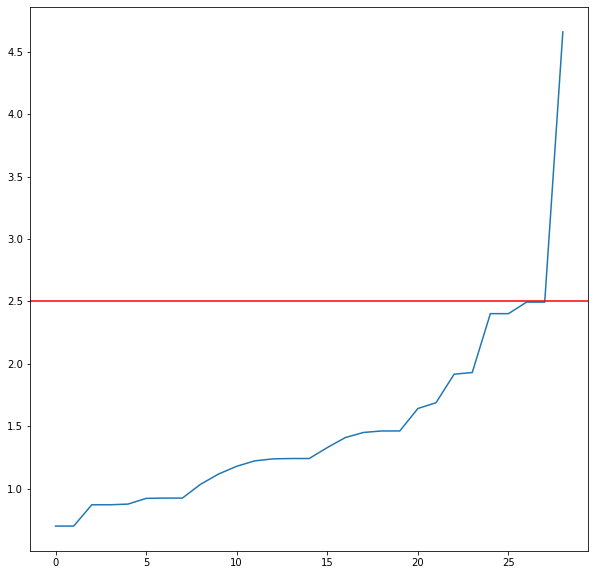

In [15]:
#Plot graph to see point where values increase exponentially 
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.axhline(y=2.5, xmin=0, xmax=30,c = "red")

In [17]:
# Instantiating a DBSCAN object, and using the fit_predict() method on this to generate an array of cluster assignments,
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.5, min_samples=2)
cluster_algo = db.fit_predict(sc_dataset)
cluster_algo

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  2, -1,  1,  1], dtype=int64)

In [18]:
#Scale dataset to Two dimentionality to reduce dimentionality using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(sc_dataset)
reduced

array([[ 3.12792712,  2.00450762],
       [-0.41213687, -0.68611289],
       [-0.10490735, -0.29094284],
       [-0.44743458, -0.83158055],
       [-1.7253997 , -0.08733029],
       [-0.88904159, -0.62496924],
       [ 1.35789512,  0.65919736],
       [-0.70429912, -0.12416215],
       [ 0.33848075, -0.1426528 ],
       [-1.5303248 , -0.49441696],
       [-1.65842458, -0.01174186],
       [ 4.23349282,  1.37427248],
       [ 0.31322822, -0.82619275],
       [-0.49318151, -0.96132778],
       [-0.76617688,  0.47882227],
       [ 0.33938883, -0.15141287],
       [-0.28284121, -0.90246325],
       [-0.30035625, -0.60466853],
       [-0.95052171,  4.85558529],
       [-0.66794039, -0.28870591],
       [-0.55141261, -1.16392648],
       [-0.88921471, -0.81701576],
       [-0.37704164, -0.67412769],
       [-0.91810276, -0.78315997],
       [-0.66268619, -0.60136667],
       [-0.88864395,  4.25260088],
       [ 7.49853819, -1.4085208 ],
       [-0.47116007, -1.09231009],
       [-1.51770258,

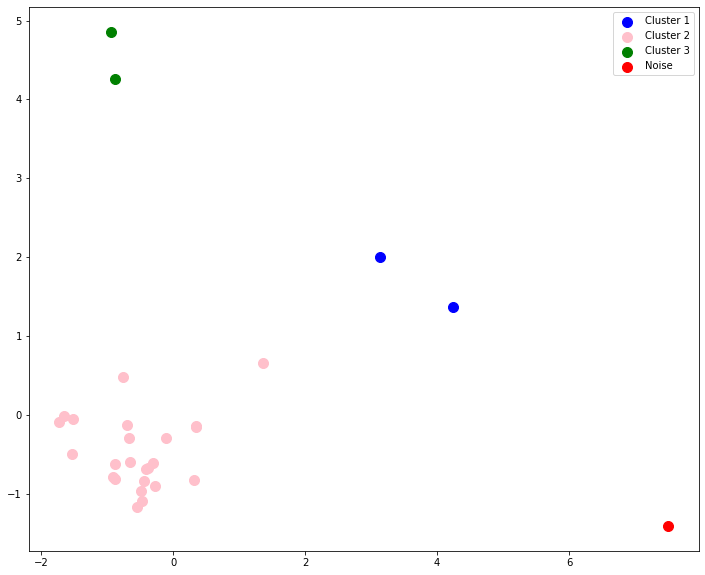

In [21]:
#Visualize on Scatter plot

clr = ['red','blue', 'green', 'pink']
plt.figure(figsize=(12,10))
plt.scatter(reduced[cluster_algo == 0, 0], reduced[cluster_algo == 0, 1], s =100, c = 'blue', label='Cluster 1')
plt.scatter(reduced[cluster_algo == 1, 0], reduced[cluster_algo == 1, 1], s =100, c = 'pink', label='Cluster 2') 
plt.scatter(reduced[cluster_algo == 2, 0], reduced[cluster_algo == 2, 1], s =100, c = 'green', label='Cluster 3')
plt.scatter(reduced[cluster_algo == -1, 0], reduced[cluster_algo == -1, 1], s =100, c = 'red', label='Noise')
plt.legend()

plt.show()